In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('/kaggle/input/bemoc-dataset/cleaned_BEmoC7k.xlsx')

In [3]:
df.head()

,TEXT,classes
0,নাইমা কি করবেন আমরা জানি,sadness
1,ভাই সব আপনাদের খুব ভাল লাগছে,joy
2,গাঞ্জা খাইয়া নিউজ শেয়ার করছে দিগন্ত বয়কটে ...,anger
3,অনেক ধন্যবাদ স্যার যশোরে ইত্যাদি অনুষ্ঠান করার...,joy
4,বর্তমানে মুসলমান মারে যে জন সে জন হয়েছে ঈশ্বর,disgust


In [4]:
df.tail()

,TEXT,classes
6995,হে আল্লাহ আপনি আমাদের দেশের প্রতি সহায়ক হন ...,sadness
6996,ঈদ ছারাও যুদি বাংলাদেশ ঈদের খুশির অামেজ পান তব...,joy
6997,বছরের সবচেয়ে সেরা ভিডিও দেখেছি আমাদের দেশের স...,joy
6998,কিরে মিথ্যা কথা কস কেন গতদিন আমি আর আসিফ আসছি...,anger
6999,\nভাইরেভাই বেস্ট এইটা বেস্ট\nএইরকম পারফেক্ট গল...,joy


In [5]:
df.rename(columns={'classes': 'label', 'TEXT': 'text'}, inplace=True)

In [6]:
df.head()

,text,label
0,নাইমা কি করবেন আমরা জানি,sadness
1,ভাই সব আপনাদের খুব ভাল লাগছে,joy
2,গাঞ্জা খাইয়া নিউজ শেয়ার করছে দিগন্ত বয়কটে ...,anger
3,অনেক ধন্যবাদ স্যার যশোরে ইত্যাদি অনুষ্ঠান করার...,joy
4,বর্তমানে মুসলমান মারে যে জন সে জন হয়েছে ঈশ্বর,disgust


In [7]:
df["label"].value_counts()

label
joy         1524
disgust     1356
sadness     1327
anger       1052
fear         962
surprise     779
Name: count, dtype: int64

In [8]:
df.isnull().sum()

text     0
label    0
dtype: int64

In [9]:
df = df.drop_duplicates()

In [10]:
#Calculating the length of each data sample

df['length'] = df['text'].apply(lambda x: len(x))

In [11]:
df.head()

,text,label,length
0,নাইমা কি করবেন আমরা জানি,sadness,24
1,ভাই সব আপনাদের খুব ভাল লাগছে,joy,28
2,গাঞ্জা খাইয়া নিউজ শেয়ার করছে দিগন্ত বয়কটে ...,anger,67
3,অনেক ধন্যবাদ স্যার যশোরে ইত্যাদি অনুষ্ঠান করার...,joy,51
4,বর্তমানে মুসলমান মারে যে জন সে জন হয়েছে ঈশ্বর,disgust,45


In [12]:
import re

def clean_text(text):    
    # Numerical and Numeric Removal
    text = re.sub(r'\d+', '', text)

    # Remove HTML tags (if present)
    text = re.sub(r'<.*?>', '', text)

    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)

    # Remove email addresses
    text = re.sub(r'\S+@\S+', '', text)

    # Remove emojis and emoticons
    text = re.sub(r'[\U00010000-\U0010ffff]', '', text)

    # Remove non-Bengali characters (assuming Bengali script is the focus)
    text = re.sub(r'[^\u0980-\u09FF\s]', '', text)
    
    return text

df['clean_text'] = df['text'].apply(lambda x: clean_text(x))

In [13]:
df['length_after_cleaning'] = df['clean_text'].apply(lambda x: len(x))

In [14]:
def make_list(text):
    words = text.split()
    
    return words

df['text_list'] = df['clean_text'].apply(lambda x: make_list(x))

In [15]:
df.head()

,text,label,length,clean_text,length_after_cleaning,text_list
0,নাইমা কি করবেন আমরা জানি,sadness,24,নাইমা কি করবেন আমরা জানি,24,"[নাইমা, কি, করবেন, আমরা, জানি]"
1,ভাই সব আপনাদের খুব ভাল লাগছে,joy,28,ভাই সব আপনাদের খুব ভাল লাগছে,28,"[ভাই, সব, আপনাদের, খুব, ভাল, লাগছে]"
2,গাঞ্জা খাইয়া নিউজ শেয়ার করছে দিগন্ত বয়কটে ...,anger,67,গাঞ্জা খাইয়া নিউজ শেয়ার করছে দিগন্ত বয়কটে ...,67,"[গাঞ্জা, খাইয়া, নিউজ, শেয়ার, করছে, দিগন্ত, ব..."
3,অনেক ধন্যবাদ স্যার যশোরে ইত্যাদি অনুষ্ঠান করার...,joy,51,অনেক ধন্যবাদ স্যার যশোরে ইত্যাদি অনুষ্ঠান করার...,51,"[অনেক, ধন্যবাদ, স্যার, যশোরে, ইত্যাদি, অনুষ্ঠা..."
4,বর্তমানে মুসলমান মারে যে জন সে জন হয়েছে ঈশ্বর,disgust,45,বর্তমানে মুসলমান মারে যে জন সে জন হয়েছে ঈশ্বর,45,"[বর্তমানে, মুসলমান, মারে, যে, জন, সে, জন, হয়েছ..."


In [16]:
pip install pyspark 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - \ done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425344 sha256=3e92ecb5dac1e3813940daaefb9101dd60d7ef12ef7d9a413ae9c81e71d35e99
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark
Note: you may need to restart the kernel to use updated packages.


In [17]:
pip install nlu

  Obtaining dependency information for nlu from https://files.pythonhosted.org/packages/3d/32/7d92bb42e5089abb90d23e01476bcb91f7db0ed352ef9378a96760acbcad/nlu-5.1.0-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.9/108.9 kB 4.9 MB/s eta 0:00:00
  Obtaining dependency information for spark-nlp>=5.0.2 from https://files.pythonhosted.org/packages/7e/11/8d8adda6e025d201d3988efe94caf18d8b427f04f378060662f5312b1b40/spark_nlp-5.1.4-py2.py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.8/54.8 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 656.0/656.0 kB 26.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.7/540.7 kB 41.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [18]:
import nlu

lemmatizer = nlu.load('bn.lemma')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


:: loading settings :: url = jar:file:/opt/conda/lib/python3.10/site-packages/pyspark/jars/ivy-2.5.1.jar!/org/apache/ivy/core/settings/ivysettings.xml


Ivy Default Cache set to: /root/.ivy2/cache
The jars for the packages stored in: /root/.ivy2/jars
com.johnsnowlabs.nlp#spark-nlp_2.12 added as a dependency
:: resolving dependencies :: org.apache.spark#spark-submit-parent-d0a11525-09dd-4f38-9e8c-d940dd12509d;1.0
	confs: [default]
	found com.johnsnowlabs.nlp#spark-nlp_2.12;5.1.4 in central
	found com.typesafe#config;1.4.2 in central
	found org.rocksdb#rocksdbjni;6.29.5 in central
	found com.amazonaws#aws-java-sdk-bundle;1.11.828 in central
	found com.github.universal-automata#liblevenshtein;3.0.0 in central
	found com.google.protobuf#protobuf-java-util;3.0.0-beta-3 in central
	found com.google.protobuf#protobuf-java;3.0.0-beta-3 in central
	found com.google.code.gson#gson;2.3 in central
	found it.unimi.dsi#fastutil;7.0.12 in central
	found org.projectlombok#lombok;1.16.8 in central
	found com.google.cloud#google-cloud-storage;2.20.1 in central
	found com.google.guava#guava;31.1-jre in central
	found com.google.guava#failureaccess;1.0.1 

lemma download started this may take some time.
Approximate size to download 90.6 KB
[ | ]lemma download started this may take some time.
Approximate size to download 90.6 KB
Download done! Loading the resource.
[OK!]


In [19]:
lemma_df = lemmatizer.predict(df['text_list'], output_level="document")

# print(lemma_df)

df['lemmatized_text'] = lemma_df.lem.values

In [20]:
df['length_afterLem'] = df['lemmatized_text'].apply(lambda x: len(x))

In [21]:
df.head()

,text,label,length,clean_text,length_after_cleaning,text_list,lemmatized_text,length_afterLem
0,নাইমা কি করবেন আমরা জানি,sadness,24,নাইমা কি করবেন আমরা জানি,24,"[নাইমা, কি, করবেন, আমরা, জানি]","[[নাইমা, ,, কি, ,, করবেন, ,, আমি, ,, জানি]]",9
1,ভাই সব আপনাদের খুব ভাল লাগছে,joy,28,ভাই সব আপনাদের খুব ভাল লাগছে,28,"[ভাই, সব, আপনাদের, খুব, ভাল, লাগছে]","[[ভাই, ,, সব, ,, আপনি, ,, খুব, ,, ভাল, ,, লাগছে]]",11
2,গাঞ্জা খাইয়া নিউজ শেয়ার করছে দিগন্ত বয়কটে ...,anger,67,গাঞ্জা খাইয়া নিউজ শেয়ার করছে দিগন্ত বয়কটে ...,67,"[গাঞ্জা, খাইয়া, নিউজ, শেয়ার, করছে, দিগন্ত, ব...","[[গাঞ্জা, ,, খাইয়া, ,, নিউজ, ,, শেয়ার, ,, কর...",21
3,অনেক ধন্যবাদ স্যার যশোরে ইত্যাদি অনুষ্ঠান করার...,joy,51,অনেক ধন্যবাদ স্যার যশোরে ইত্যাদি অনুষ্ঠান করার...,51,"[অনেক, ধন্যবাদ, স্যার, যশোরে, ইত্যাদি, অনুষ্ঠা...","[[অনেক, ,, ধন্যবাদ, ,, স্যার, ,, যশোরে, ,, ইত্...",15
4,বর্তমানে মুসলমান মারে যে জন সে জন হয়েছে ঈশ্বর,disgust,45,বর্তমানে মুসলমান মারে যে জন সে জন হয়েছে ঈশ্বর,45,"[বর্তমানে, মুসলমান, মারে, যে, জন, সে, জন, হয়েছ...","[[বর্তমানে, ,, মুসলমান, ,, মারে, ,, যে, ,, জন,...",17


In [22]:
# print(df['lemmatized_text'].dtype)

In [23]:
text_list = df['lemmatized_text'].values.tolist()
label = df['label'].tolist()

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(text_list, label, test_size=0.20, random_state=42)

In [25]:
pip install ktrain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 52.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 52.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Obtaining dependency information for chardet from https://files.pythonhosted.org/packages/38/6f/f5fbc992a329ee4e0f288c1fe0e2ad9485ed064cac731ed2fe47dcc38cbf/chardet-5.2.0-py3-none-any.whl.metadata
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 kB 38.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.4/199.4 kB 16.9

In [26]:
import ktrain
from ktrain import text
MODEL_NAME = 'sagorsarker/bangla-bert-base'
t = text.Transformer(MODEL_NAME, maxlen=500)

In [27]:
X_train = [str(text) for text in X_train]
X_test = [str(text) for text in X_test]

In [28]:
trn = t.preprocess_train(X_train, y_train)
val = t.preprocess_test(X_test, y_test)

preprocessing train...
language: bn
train sequence lengths:
	mean : 41
	95percentile : 81
	99percentile : 117


Is Multi-Label? False
preprocessing test...
language: bn
test sequence lengths:
	mean : 41
	95percentile : 81
	99percentile : 104


In [29]:
model = t.get_classifier()

In [30]:
learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=8)

In [31]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = learner.fit_onecycle(2e-5, 15, callbacks=[early_stopping])



begin training using onecycle policy with max lr of 2e-05...
Epoch 1/15
684/684 [==============================] - 445s 617ms/step - loss: 1.6626 - accuracy: 0.3107 - val_loss: 1.4471 - val_accuracy: 0.4108
Epoch 2/15
684/684 [==============================] - 418s 611ms/step - loss: 1.2898 - accuracy: 0.4977 - val_loss: 1.2693 - val_accuracy: 0.4883
Epoch 3/15
684/684 [==============================] - 419s 612ms/step - loss: 1.0513 - accuracy: 0.6016 - val_loss: 1.1549 - val_accuracy: 0.5563
Epoch 4/15
684/684 [==============================] - 418s 611ms/step - loss: 0.8465 - accuracy: 0.6877 - val_loss: 1.2233 - val_accuracy: 0.5577
Epoch 5/15
684/684 [==============================] - 418s 611ms/step - loss: 0.6039 - accuracy: 0.7819 - val_loss: 1.4439 - val_accuracy: 0.5080
Epoch 6/15
684/684 [==============================] - 419s 612ms/step - loss: 0.4439 - accuracy: 0.8468 - val_loss: 1.5711 - val_accuracy: 0.5095


In [32]:
learner.validate(class_names=t.get_classes()) 

43/43 [==============================] - 32s 685ms/step
              precision    recall  f1-score   support

       anger       0.53      0.34      0.41       202
     disgust       0.44      0.56      0.49       280
        fear       0.70      0.66      0.68       205
         joy       0.67      0.67      0.67       289
     sadness       0.48      0.60      0.53       250
    surprise       0.62      0.41      0.49       142

    accuracy                           0.56      1368
   macro avg       0.57      0.54      0.55      1368
weighted avg       0.57      0.56      0.55      1368



array([[ 68,  87,  13,   5,  27,   2],
       [ 31, 156,   9,  27,  50,   7],
       [  4,  12, 135,   8,  33,  13],
       [  8,  41,   8, 194,  31,   7],
       [ 14,  43,  13,  24, 150,   6],
       [  4,  14,  14,  31,  21,  58]])

In [33]:
def PlotGraph(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'g', label='Training acc')
    plt.plot(x, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'g', label='Training loss')
    plt.plot(x, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend() 

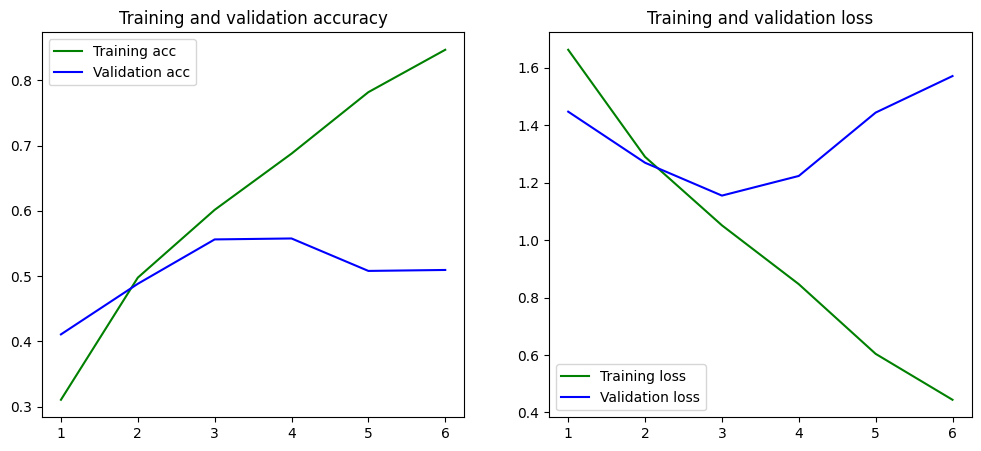

In [34]:
PlotGraph(history)